# Example 9.4: Brayton Cycle (Cold-Air-Standard)

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement

Air enters the compressor of a cold air-standard Brayton cycle at $100\ \mathrm{kPa}$, $300\mathrm{K}$ with a volumetric flow rate of $5\ \mathrm{m^3/s}$.  The pressure ratio is $10$ and the turbine inlet temperature is $1400\ \mathrm{K}$.  The turbine and compressor each have an isentropic efficiency of $80\%$.

* (a) $p$-$v$ diagram
* (b) $T$-$s$ diagram
* (c) Back work ratio
* (d) Net power
* (e) $\eta_{th}$

## Solution

__[Video Explanation](https://uky.yuja.com/V/Video?v=3074251&node=10465179&a=1485165775&autoplay=1)__

### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [3]:
from kilojoule.templates.kSI import *
    
air = realfluid.Properties('Air',unit_system='SI_K')

### Given Parameters
We now define variables to hold our known values.

In [4]:
%%showcalc
T[1] = Quantity(300,'K')      # Compressor Inlet Temperature
p[1] = Quantity(1,'bar')      # Compressor Inlet pressure
Vdot[1] = Quantity(5,'m^3/s') # Volumetic Flow rate into Compressor
r_p = Quantity(10,'')         # Pressure ratio
T[3] = Quantity(1400,'K')     # Turbine Inlet Temperature
eta_c = Quantity(0.8,'')      # Compressor Isentropioc Efficiency
eta_t = Quantity(0.8,'')      # Turbine Isentropic Efficiency

\begin{align}
  {T}_{ 1 } &=  300\ \mathrm{K} 
\end{align}

\begin{align}
  {p}_{ 1 } &=  1\ \mathrm{bar}  = 100.0\ \mathrm{kPa} 
\end{align}

\begin{align}
  {\dot{V}}_{ 1 } &=  5\ \frac{\mathrm{m}^{3}}{\mathrm{s}} 
\end{align}

\begin{align}
  r_{p} &=  10 
\end{align}

\begin{align}
  {T}_{ 3 } &=  1400\ \mathrm{K} 
\end{align}

\begin{align}
  \eta_{c} &=  0.8 
\end{align}

\begin{align}
  \eta_{t} &=  0.8 
\end{align}



### Assumptions
- Cold-air-standard Analysis
  - Ideal gas
  - Constant specific heat (evaluated at $25^\circ\text{C}$)
- Maximum pressure occurs at states 3 and 4
- Maximum temperature occurs at state 4
- Negligible changes in kinetic energy
- Negligible changes in potential energy

#### (a) and (b) 
If working the problem by hand, we could (should) go ahead and sketch out the path of the cycle without knowing the exact values of the states.  This is useful to serve as a roadmap as we work our way through the analysis.  However, since we need exact value to do the plotting with a computer, we will wait until the end to draw the $p$-$v$ and $T$-$s$ diagrams

#### (c) $T$ and $p$

In [5]:
%%showcalc
"#### 1-2) Non-ideal compression"
"State 1 properties"
h[1] = air.h(T=T[1],p=p[1])
s[1] = air.s(T=T[1],p=p[1])

"Isentropic exit state: Isentropic Ideal Gas Relations"
p[2] = p[1]*r_p
p['2s'] = p[2]
s['2s'] = s[1]
h['2s'] = air.h(p=p['2s'],s=s['2s'])
T['2s'] = air.T(h=h['2s'],p=p['2s'])

"Isentropic efficiency"
h[2] = h[1] + (h['2s']-h[1])/eta_c
T[2] = air.T(h=h[2],p=p[2])
s[2] = air.s(p=p[2],h=h[2])

"Mass flow rate through compressor"
v[1] = air.v(T=T[1],p=p[1])
mdot = (Vdot[1]/v[1]).to('kg/s')

"First Law for compressor"
Wdot_1_to_2 = (mdot*(h[1]-h[2])).to('kW')

"#### 2-3) Isobaric heat addition"
p[3] = p[2]
h[3] = air.h(T=T[3],p=p[3])
s[3] = air.s(T=T[3],p=p[3])

"#### 3-4) Non-ideal expansion"
"Isentropic exit state: Isentropic Ideal Gas Relations"
p[4] = p[1]
p['4s'] = p[4]
s['4s'] = s[3]
h['4s'] = air.h(p=p['4s'],s=s['4s'])
T['4s'] = air.T(h=h['4s'],p=p['4s'])

"Isentropic efficiency"
h[4] = h[3] - eta_t*(h[3]-h['4s'])
T[4] = air.T(h=h[4],p=p[4])
s[4] = air.s(p=p[4],h=h[4])

"First law for turbine"
Wdot_3_to_4 = (mdot*(h[3]-h[4])).to('kW')

"#### Backwork Ratio"
BWR = -Wdot_1_to_2/Wdot_3_to_4

#### 1-2) Non-ideal compression
State 1 properties
\begin{align}
  {h}_{ 1 } &=  \mathrm{ \underset{ air }{ h } }\left( \mathrm{ T } = {T}_{ 1 }, \mathrm{ p } = {p}_{ 1 } \right)  = \mathrm{ \underset{ air }{ h } }\left( \mathrm{ T } = 300\ \mathrm{K}, \mathrm{ p } = 100.0\ \mathrm{kPa} \right) = 426.3\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {s}_{ 1 } &=  \mathrm{ \underset{ air }{ s } }\left( \mathrm{ T } = {T}_{ 1 }, \mathrm{ p } = {p}_{ 1 } \right)  = \mathrm{ \underset{ air }{ s } }\left( \mathrm{ T } = 300\ \mathrm{K}, \mathrm{ p } = 100.0\ \mathrm{kPa} \right) = 3.8905\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

Isentropic exit state: Isentropic Ideal Gas Relations
\begin{align}
  {p}_{ 2 } &=   {p}_{ 1 }  \cdot  r_{p}  \\
    &=  100.0\ \mathrm{kPa}  \cdot  10 \\
    &= 1000.0\ \mathrm{kPa}
\end{align}

\begin{align}
  {p}_{ \mathrm{2s} } &=  {p}_{ 2 }  = 1000.0\ \mathrm{kPa} 
\end{align}

\begin{align}
  {s}_{ \mathrm{2s} } &=  {s}_{ 1 }  = 3.8905\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} 
\end{align}

\begin{align}
  {h}_{ \mathrm{2s} } &=  \mathrm{ \underset{ air }{ h } }\left( \mathrm{ p } = {p}_{ \mathrm{2s} }, \mathrm{ s } = {s}_{ \mathrm{2s} } \right)  = \mathrm{ \underset{ air }{ h } }\left( \mathrm{ p } = 1000.0\ \mathrm{kPa}, \mathrm{ s } = 3.8905\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \right) = 706.45\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {T}_{ \mathrm{2s} } &=  \mathrm{ \underset{ air }{ T } }\left( \mathrm{ h } = {h}_{ \mathrm{2s} }, \mathrm{ p } = {p}_{ \mathrm{2s} } \right)  = \mathrm{ \underset{ air }{ T } }\left( \mathrm{ h } = 706.45\ \frac{\mathrm{kJ}}{\mathrm{kg}}, \mathrm{ p } = 1000.0\ \mathrm{kPa} \right) = 574.45\ \mathrm{K}
\end{align}

Isentropic efficiency
\begin{align}
  {h}_{ 2 } &=  {h}_{ 1 } + \frac{  {h}_{ \mathrm{2s} } - {h}_{ 1 }  }{ \eta_{c} } \\
    &= 426.3\ \frac{\mathrm{kJ}}{\mathrm{kg}} + \frac{  706.45\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 426.3\ \frac{\mathrm{kJ}}{\mathrm{kg}}  }{ 0.8 }\\
    &= 776.49\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {T}_{ 2 } &=  \mathrm{ \underset{ air }{ T } }\left( \mathrm{ h } = {h}_{ 2 }, \mathrm{ p } = {p}_{ 2 } \right)  = \mathrm{ \underset{ air }{ T } }\left( \mathrm{ h } = 776.49\ \frac{\mathrm{kJ}}{\mathrm{kg}}, \mathrm{ p } = 1000.0\ \mathrm{kPa} \right) = 640.79\ \mathrm{K}
\end{align}

\begin{align}
  {s}_{ 2 } &=  \mathrm{ \underset{ air }{ s } }\left( \mathrm{ p } = {p}_{ 2 }, \mathrm{ h } = {h}_{ 2 } \right)  = \mathrm{ \underset{ air }{ s } }\left( \mathrm{ p } = 1000.0\ \mathrm{kPa}, \mathrm{ h } = 776.49\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 4.0059\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

Mass flow rate through compressor
\begin{align}
  {v}_{ 1 } &=  \mathrm{ \underset{ air }{ v } }\left( \mathrm{ T } = {T}_{ 1 }, \mathrm{ p } = {p}_{ 1 } \right)  = \mathrm{ \underset{ air }{ v } }\left( \mathrm{ T } = 300\ \mathrm{K}, \mathrm{ p } = 100.0\ \mathrm{kPa} \right) = 0.86088\ \frac{\mathrm{m}^{3}}{\mathrm{kg}}
\end{align}

\begin{align}
  \dot{m} &=  \frac{ {\dot{V}}_{ 1 } }{ {v}_{ 1 } } \\
    &= \frac{ 5\ \frac{\mathrm{m}^{3}}{\mathrm{s}} }{ 0.86088\ \frac{\mathrm{m}^{3}}{\mathrm{kg}} }\\
    &= 5.808\ \frac{\mathrm{kg}}{\mathrm{s}}
\end{align}

First Law for compressor
\begin{align}
  \dot{W}_{1\to{}2} &=   \dot{m}  \cdot  \left(  {h}_{ 1 } - {h}_{ 2 }  \right)  \\
    &=  5.808\ \frac{\mathrm{kg}}{\mathrm{s}}  \cdot  \left(  426.3\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 776.49\ \frac{\mathrm{kJ}}{\mathrm{kg}}  \right) \\
    &= -2033.9\ \mathrm{kW}
\end{align}

#### 2-3) Isobaric heat addition
\begin{align}
  {p}_{ 3 } &=  {p}_{ 2 }  = 1000.0\ \mathrm{kPa} 
\end{align}

\begin{align}
  {h}_{ 3 } &=  \mathrm{ \underset{ air }{ h } }\left( \mathrm{ T } = {T}_{ 3 }, \mathrm{ p } = {p}_{ 3 } \right)  = \mathrm{ \underset{ air }{ h } }\left( \mathrm{ T } = 1400\ \mathrm{K}, \mathrm{ p } = 1000.0\ \mathrm{kPa} \right) = 1642.5\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {s}_{ 3 } &=  \mathrm{ \underset{ air }{ s } }\left( \mathrm{ T } = {T}_{ 3 }, \mathrm{ p } = {p}_{ 3 } \right)  = \mathrm{ \underset{ air }{ s } }\left( \mathrm{ T } = 1400\ \mathrm{K}, \mathrm{ p } = 1000.0\ \mathrm{kPa} \right) = 4.8902\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

#### 3-4) Non-ideal expansion
Isentropic exit state: Isentropic Ideal Gas Relations
\begin{align}
  {p}_{ 4 } &=  {p}_{ 1 }  = 100.0\ \mathrm{kPa} 
\end{align}

\begin{align}
  {p}_{ \mathrm{4s} } &=  {p}_{ 4 }  = 100.0\ \mathrm{kPa} 
\end{align}

\begin{align}
  {s}_{ \mathrm{4s} } &=  {s}_{ 3 }  = 4.8902\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} 
\end{align}

\begin{align}
  {h}_{ \mathrm{4s} } &=  \mathrm{ \underset{ air }{ h } }\left( \mathrm{ p } = {p}_{ \mathrm{4s} }, \mathrm{ s } = {s}_{ \mathrm{4s} } \right)  = \mathrm{ \underset{ air }{ h } }\left( \mathrm{ p } = 100.0\ \mathrm{kPa}, \mathrm{ s } = 4.8902\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \right) = 934.92\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {T}_{ \mathrm{4s} } &=  \mathrm{ \underset{ air }{ T } }\left( \mathrm{ h } = {h}_{ \mathrm{4s} }, \mathrm{ p } = {p}_{ \mathrm{4s} } \right)  = \mathrm{ \underset{ air }{ T } }\left( \mathrm{ h } = 934.92\ \frac{\mathrm{kJ}}{\mathrm{kg}}, \mathrm{ p } = 100.0\ \mathrm{kPa} \right) = 787.71\ \mathrm{K}
\end{align}

Isentropic efficiency
\begin{align}
  {h}_{ 4 } &=   {h}_{ 3 } -  \eta_{t}  \cdot  \left(  {h}_{ 3 } - {h}_{ \mathrm{4s} }  \right)   \\
    &=  1642.5\ \frac{\mathrm{kJ}}{\mathrm{kg}} -  0.8  \cdot  \left(  1642.5\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 934.92\ \frac{\mathrm{kJ}}{\mathrm{kg}}  \right)  \\
    &= 1076.4\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {T}_{ 4 } &=  \mathrm{ \underset{ air }{ T } }\left( \mathrm{ h } = {h}_{ 4 }, \mathrm{ p } = {p}_{ 4 } \right)  = \mathrm{ \underset{ air }{ T } }\left( \mathrm{ h } = 1076.4\ \frac{\mathrm{kJ}}{\mathrm{kg}}, \mathrm{ p } = 100.0\ \mathrm{kPa} \right) = 915.18\ \mathrm{K}
\end{align}

\begin{align}
  {s}_{ 4 } &=  \mathrm{ \underset{ air }{ s } }\left( \mathrm{ p } = {p}_{ 4 }, \mathrm{ h } = {h}_{ 4 } \right)  = \mathrm{ \underset{ air }{ s } }\left( \mathrm{ p } = 100.0\ \mathrm{kPa}, \mathrm{ h } = 1076.4\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 5.0567\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

First law for turbine
\begin{align}
  \dot{W}_{3\to{}4} &=   \dot{m}  \cdot  \left(  {h}_{ 3 } - {h}_{ 4 }  \right)  \\
    &=  5.808\ \frac{\mathrm{kg}}{\mathrm{s}}  \cdot  \left(  1642.5\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 1076.4\ \frac{\mathrm{kJ}}{\mathrm{kg}}  \right) \\
    &= 3287.9\ \mathrm{kW}
\end{align}

#### Backwork Ratio
\begin{align}
  BWR &=  \frac{ -\dot{W}_{1\to{}2} }{ \dot{W}_{3\to{}4} } \\
    &= \frac{ -\left( -2033.9\ \mathrm{kW} \right) }{ 3287.9\ \mathrm{kW} }\\
    &= 0.6186
\end{align}



#### (d) Net power

In [6]:
%%showcalc
"Turbine work"
Wdot_T = Wdot_3_to_4

"Compressor work"
Wdot_C = -Wdot_1_to_2

"Net work"
Wdot_net = Wdot_T-Wdot_C

Turbine work
\begin{align}
  \dot{W}_{T} &=  \dot{W}_{3\to{}4}  = 3287.9\ \mathrm{kW} 
\end{align}

Compressor work
\begin{align}
  \dot{W}_{C} &=  -\dot{W}_{1\to{}2}  = -\left( -2033.9\ \mathrm{kW} \right) = 2033.9\ \mathrm{kW}
\end{align}

Net work
\begin{align}
  \dot{W}_{net} &=   \dot{W}_{T} - \dot{W}_{C}  \\
    &=  3287.9\ \mathrm{kW} - 2033.9\ \mathrm{kW} \\
    &= 1254.0\ \mathrm{kW}
\end{align}



#### (e) Thermal efficiency

In [7]:
%%showcalc
"#### 2 k3) Isobaric heat addition"
"First law for combuster"
Qdot_2_to_3 = (mdot*(h[3]-h[2])).to('kW')

"Heat input"
Qdot_in = Qdot_2_to_3

"#### Thermal efficiency"
eta_th = Wdot_net/Qdot_in

"#### Second Law efficienhcy"
"The low temperature is assumed to be the intake temperature"
T_L = T[1]
"The high temperature is approximated as the hottest temperature of the working fluid"
T_H = T[3]
"Carnot efficiency"
eta_th_Carnot = 1-T_L/T_H

"Second Law efficiency"
eta_II = eta_th/eta_th_Carnot

#### 2 k3) Isobaric heat addition
First law for combuster
\begin{align}
  \dot{Q}_{2\to{}3} &=   \dot{m}  \cdot  \left(  {h}_{ 3 } - {h}_{ 2 }  \right)  \\
    &=  5.808\ \frac{\mathrm{kg}}{\mathrm{s}}  \cdot  \left(  1642.5\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 776.49\ \frac{\mathrm{kJ}}{\mathrm{kg}}  \right) \\
    &= 5030.0\ \mathrm{kW}
\end{align}

Heat input
\begin{align}
  \dot{Q}_{in} &=  \dot{Q}_{2\to{}3}  = 5030.0\ \mathrm{kW} 
\end{align}

#### Thermal efficiency
\begin{align}
  \eta_{th} &=  \frac{ \dot{W}_{net} }{ \dot{Q}_{in} } \\
    &= \frac{ 1254.0\ \mathrm{kW} }{ 5030.0\ \mathrm{kW} }\\
    &= 0.2493
\end{align}

#### Second Law efficienhcy
The low temperature is assumed to be the intake temperature
\begin{align}
  T_{L} &=  {T}_{ 1 }  = 300\ \mathrm{K} 
\end{align}

The high temperature is approximated as the hottest temperature of the working fluid
\begin{align}
  T_{H} &=  {T}_{ 3 }  = 1400\ \mathrm{K} 
\end{align}

Carnot efficiency
\begin{align}
  \eta_{th,Carnot} &=   1 - \frac{ T_{L} }{ T_{H} }  \\
    &=  1 - \frac{ 300\ \mathrm{K} }{ 1400\ \mathrm{K} } \\
    &= 0.78571
\end{align}

Second Law efficiency
\begin{align}
  \eta_{II} &=  \frac{ \eta_{th} }{ \eta_{th,Carnot} } \\
    &= \frac{ 0.2493 }{ 0.78571 }\\
    &= 0.31729
\end{align}



#### (a) $p$-$v$
Note: the isentropic lines do not line up exactly with the states in this diagram because the entropies were calculated for variable specific heat, but all other properties were calculated using the
cold-air-standard assumptions (constant specific heat).  

##### Linear Scale

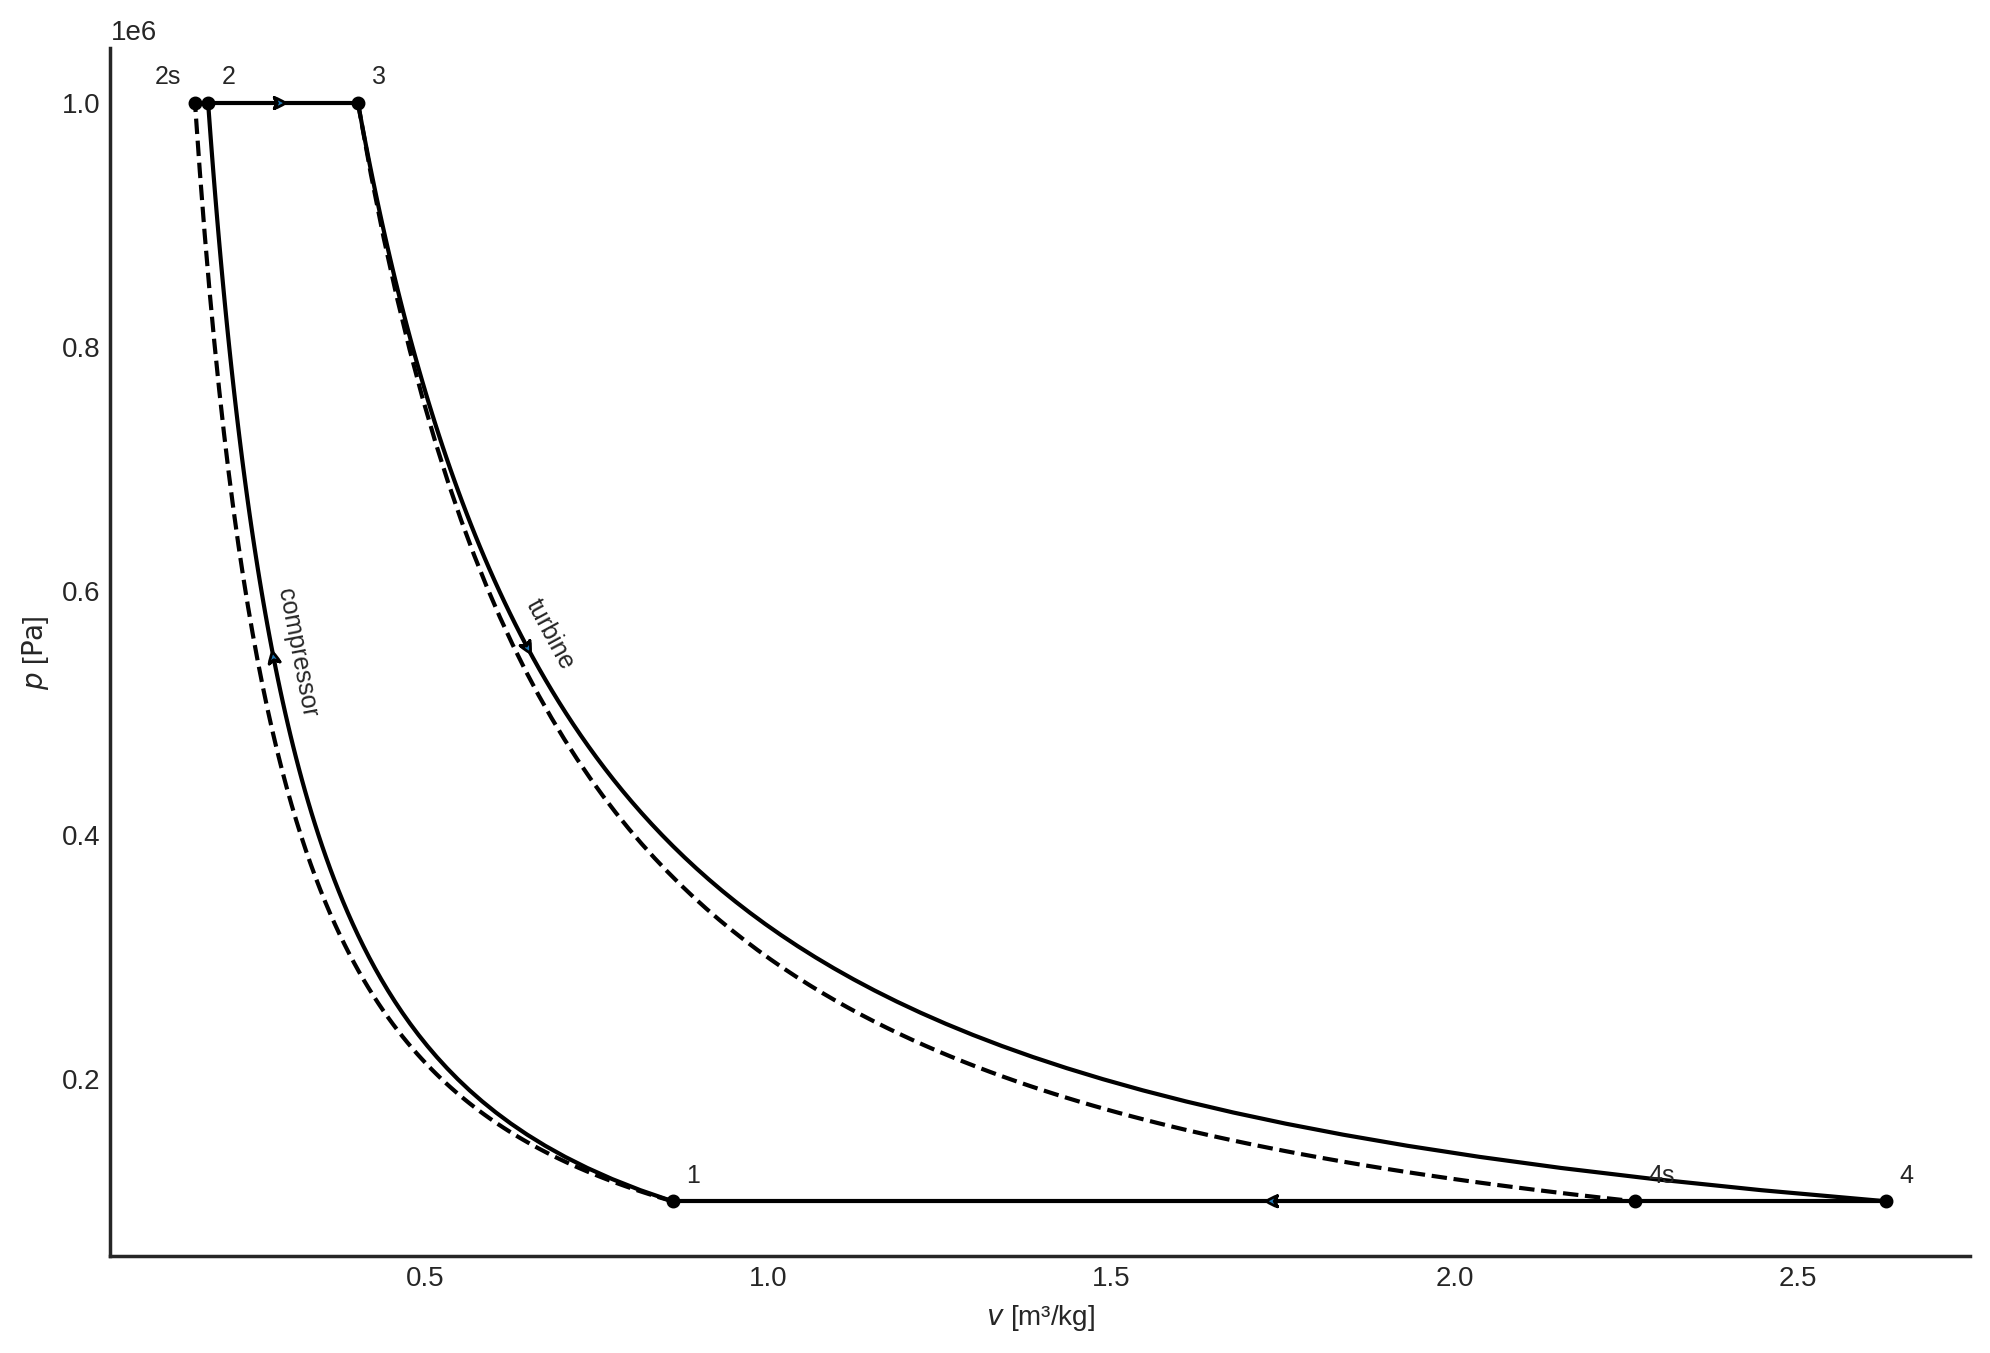

In [8]:
pv = air.pv_diagram(saturation=False)

# plot each state on the p,v diagram and calculate the entropy at each state
for i in [1,2,3,'4s',4]:
    v[i] = air.v(T=T[i],p=p[i])
    pv.plot_state(states[i],label_loc='north east')

v['2s'] = air.v(T=T['2s'],p=p['2s'])
pv.plot_state(states['2s'],label_loc='north west')

# plot the process paths
pv.plot_process(states[1],states['2s'],path='isentropic',linestyle='dashed',arrow=False)
pv.plot_process(states[1],states[2],path='nonideal',label='compressor')
pv.plot_process(states[2],states[3],path='isobaric')
pv.plot_process(states[3],states['4s'],path='isentropic',linestyle='dashed',arrow=False)
pv.plot_process(states[3],states[4],path='nonideal',label='turbine')
pv.plot_process(states[4],states[1],path='isobaric');

##### Log-Log Scale

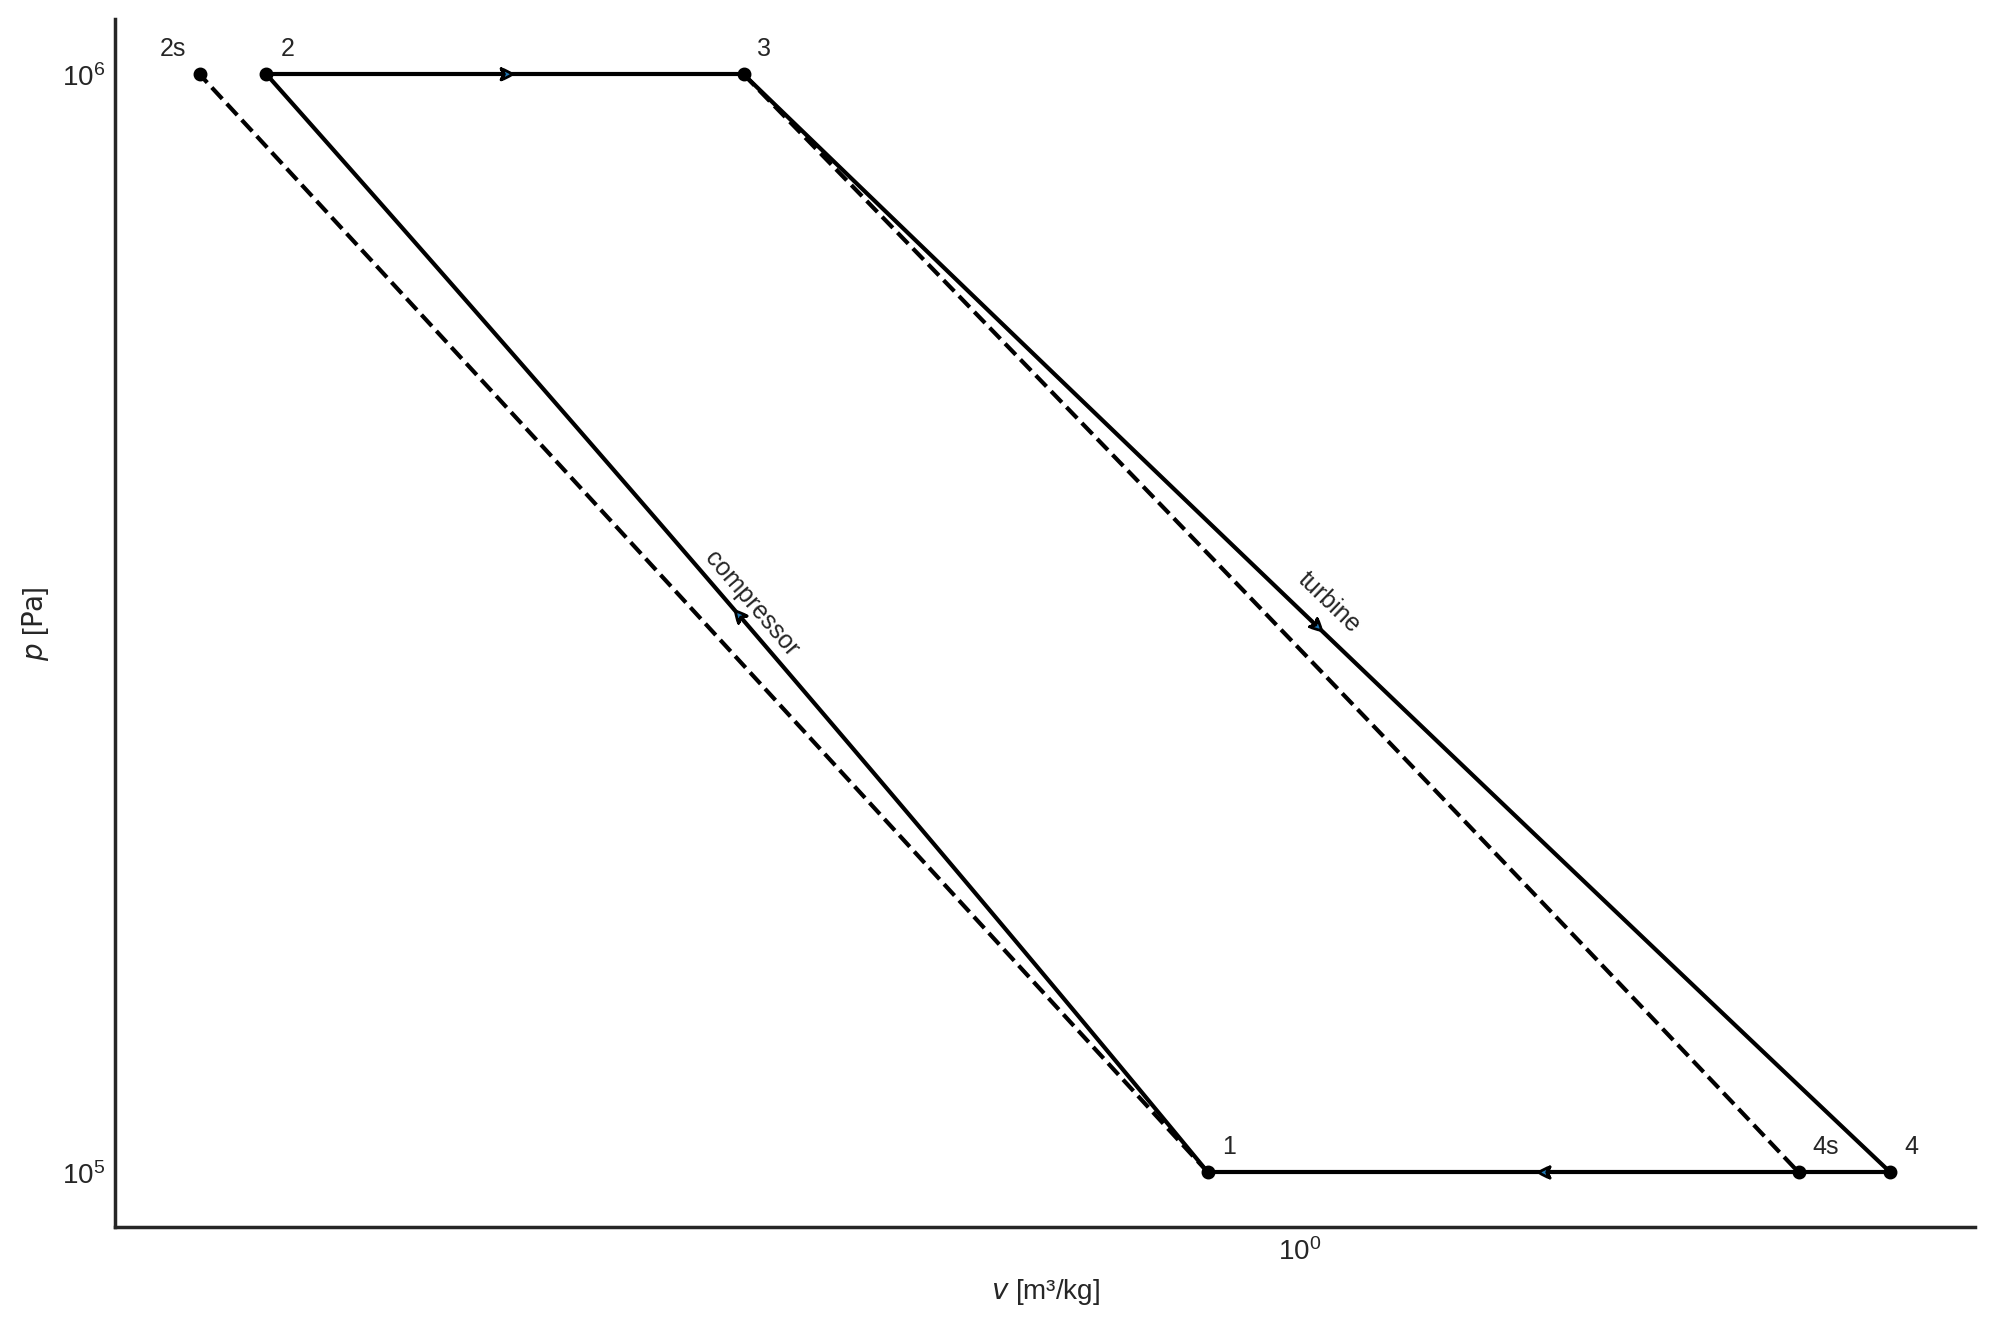

In [9]:
pv = air.pv_diagram(saturation=False, log_x=True, log_y=True)

# plot each state on the p,v diagram and calculate the entropy at each state
for i in [1,2,3,'4s',4]:
    v[i] = air.v(T=T[i],p=p[i])
    pv.plot_state(states[i],label_loc='north east')

v['2s'] = air.v(T=T['2s'],p=p['2s'])
pv.plot_state(states['2s'],label_loc='north west')

# plot the process paths
pv.plot_process(states[1],states['2s'],path='isentropic',linestyle='dashed',arrow=False)
pv.plot_process(states[1],states[2],path='nonideal',label='compressor')
pv.plot_process(states[2],states[3],path='isobaric')
pv.plot_process(states[3],states['4s'],path='isentropic',linestyle='dashed',arrow=False)
pv.plot_process(states[3],states[4],path='nonideal',label='turbine')
pv.plot_process(states[4],states[1],path='isobaric');

#### (b) $T$-$s$ diagram
Note: the isentropic lines are not vertical in this diagram because the entropies were 
calculated for variable specific heat, but all other properties were calculated using the
cold-air-standard assumptions (constant specific heat).  Therefore the errors resulting from the constant specific heat assumption are evident in the skewed shape of the cycle on the $T$-$s$ diagram.

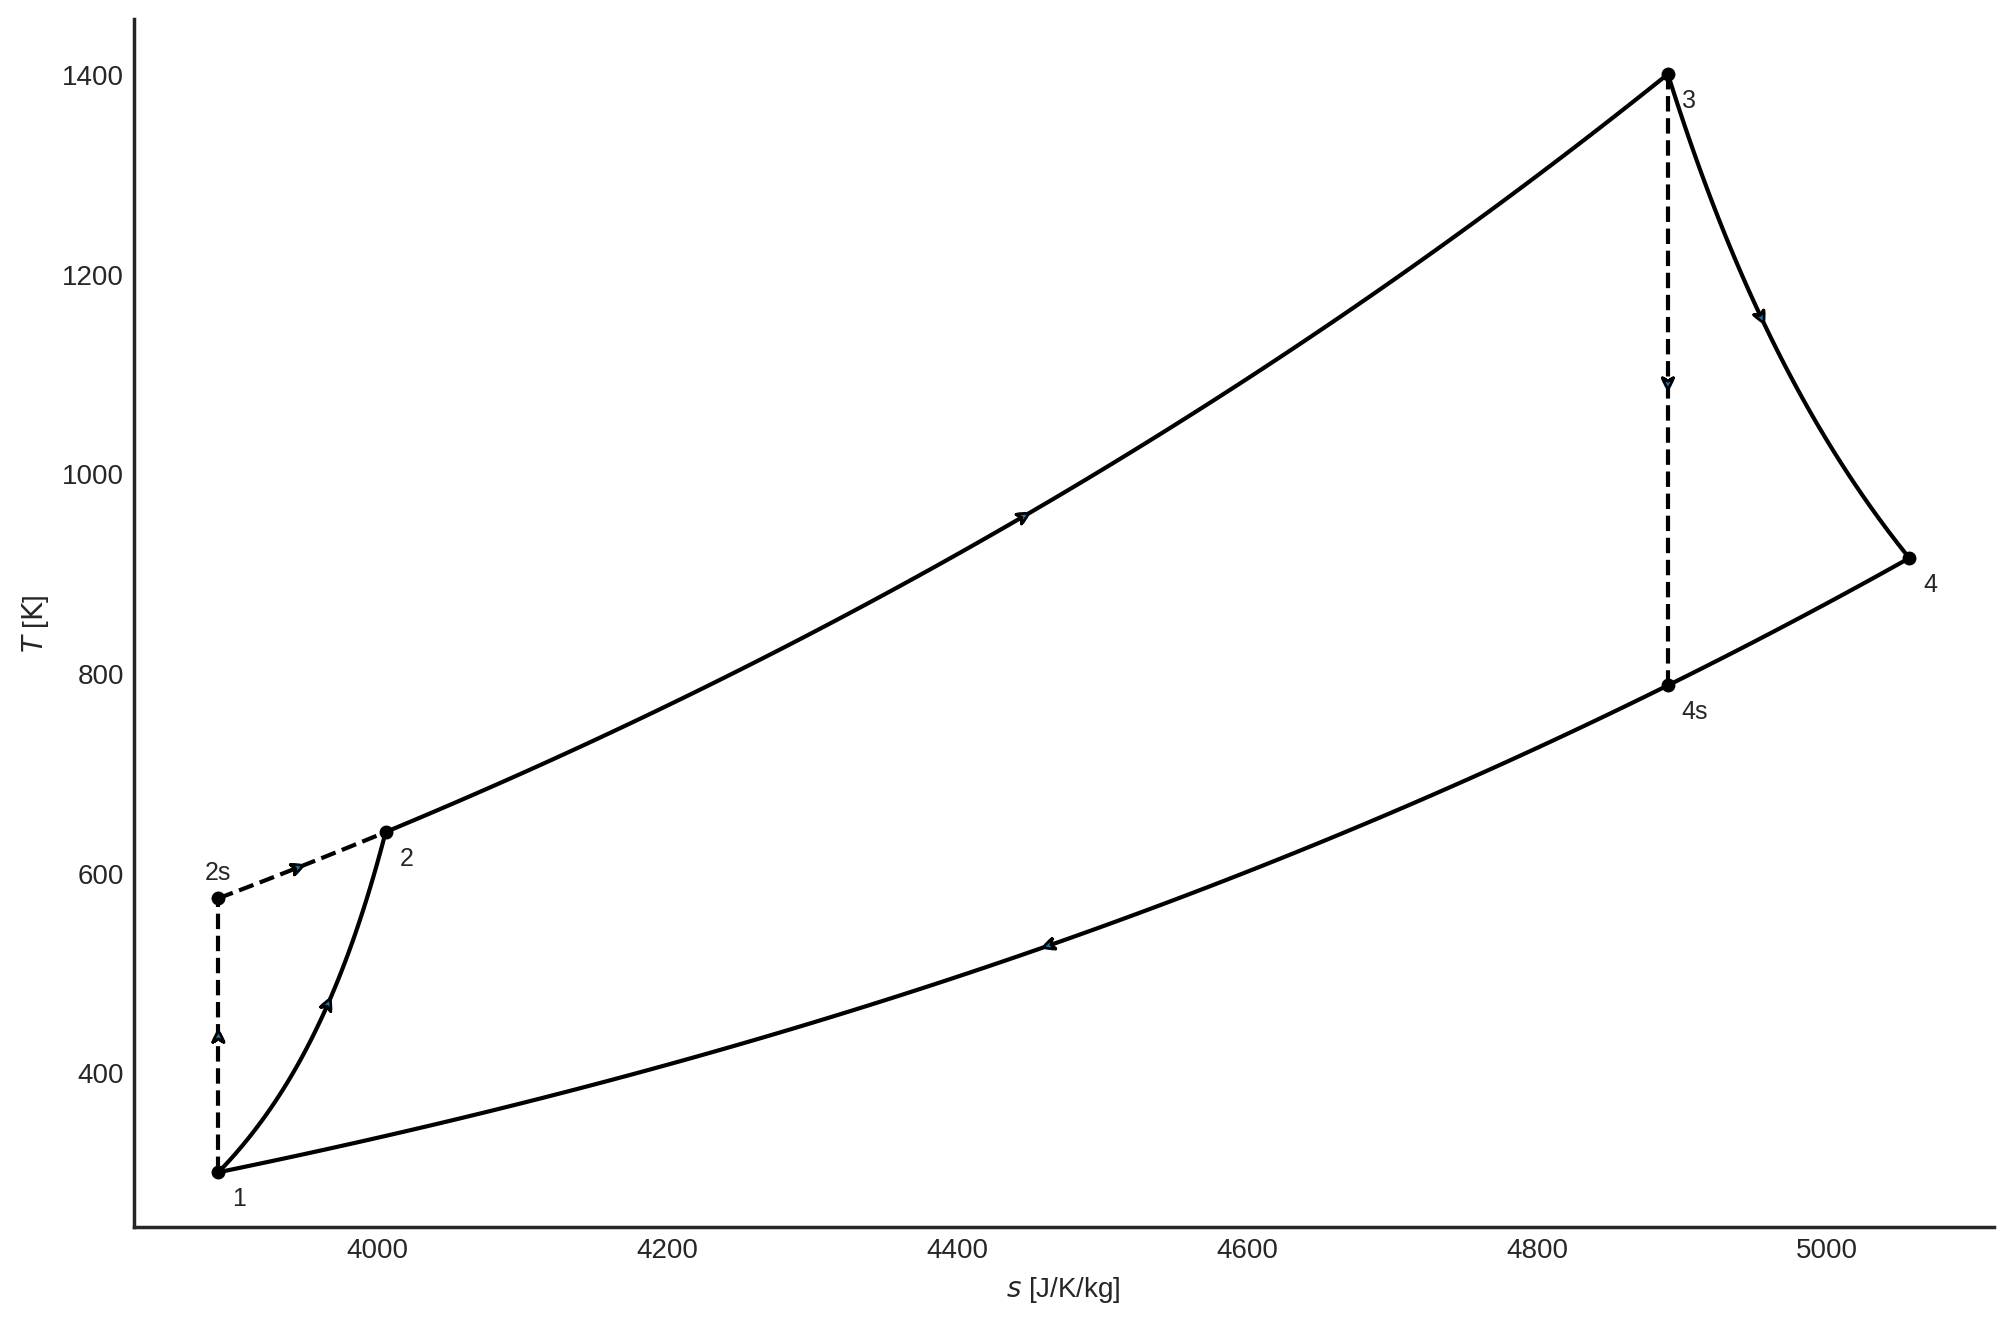

In [10]:
Ts = air.Ts_diagram(saturation=False)

for i in [1,2,3,4]:
    Ts.plot_state(states[i],label_loc='south east')

Ts.plot_state(states['2s'],label_loc='north')
Ts.plot_state(states['4s'],label_loc='south east')
    
Ts.plot_process(states[1],states['2s'],path='isentropic',linestyle='dashed')
Ts.plot_process(states[1],states[2],path='isentropic efficiency')
Ts.plot_process(states['2s'],states[2],path='isobaric',linestyle='dashed')
Ts.plot_process(states[2],states[3],path='isobaric')
Ts.plot_process(states[3],states['4s'],path='isentropic',linestyle='dashed')
Ts.plot_process(states[3],states[4],path='isentropic efficiency')
Ts.plot_process(states[4],states[1],path='isobaric');

In [13]:
%%showcalc
Summary();
Summary(['BWR','Wdot_net','eta_th']);


\begin{align}{ BWR }&={ 0.6186 }&{ \dot{Q}_{2\to{}3} }&={ 5030.0\ \mathrm{kW} }&{ \dot{Q}_{in} }&={ 5030.0\ \mathrm{kW} }\\{ T_{H} }&={ 1400\ \mathrm{K} }&{ T_{L} }&={ 300\ \mathrm{K} }&{ \dot{W}_{1\to{}2} }&={ -2033.9\ \mathrm{kW} }\\{ \dot{W}_{3\to{}4} }&={ 3287.9\ \mathrm{kW} }&{ \dot{W}_{C} }&={ 2033.9\ \mathrm{kW} }&{ \dot{W}_{T} }&={ 3287.9\ \mathrm{kW} }\\{ \dot{W}_{net} }&={ 1254.0\ \mathrm{kW} }&{ \eta_{II} }&={ 0.31729 }&{ \eta_{c} }&={ 0.8 }\\{ \eta_{t} }&={ 0.8 }&{ \eta_{th} }&={ 0.2493 }&{ \eta_{th,Carnot} }&={ 0.78571 }\\{ \dot{m} }&={ 5.808\ \frac{\mathrm{kg}}{\mathrm{s}} }&{ r_{p} }&={ 10 }&{  }\end{align}
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>$T$ [K]</th>
      <th>$p$ [kPa]</th>
      <th>$v$ [m³/kg]</th>
      <th>$h$ [kJ/kg]</th>
      <th>$s$ [kJ/K/kg]</th>
      <th>$\dot{V}$ [m³/s]</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>300.000000</td>
      <td>100.0</td>
      <td>0.860882</td>
      <td>426.300776</td>
      <td>3.890501</td>
      <td>5.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>640.792264</td>
      <td>1000.0</td>
      <td>0.184619</td>
      <td>776.489114</td>
      <td>4.005867</td>
      <td>-</td>
    </tr>
    <tr>
      <th>2s</th>
      <td>574.451983</td>
      <td>1000.0</td>
      <td>0.165497</td>
      <td>706.451446</td>
      <td>3.890501</td>
      <td>-</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1400.000000</td>
      <td>1000.0</td>
      <td>0.402841</td>
      <td>1642.536333</td>
      <td>4.890246</td>
      <td>-</td>
    </tr>
    <tr>
      <th>4</th>
      <td>915.178601</td>
      <td>100.0</td>
      <td>2.627873</td>
      <td>1076.440588</td>
      <td>5.056721</td>
      <td>-</td>
    </tr>
    <tr>
      <th>4s</th>
      <td>787.705929</td>
      <td>100.0</td>
      <td>2.261898</td>
      <td>934.916651</td>
      <td>4.890246</td>
      <td>-</td>
    </tr>
  </tbody>
</table>

\begin{align}{ BWR }&={ 0.6186 }\\{ \dot{W}_{net} }&={ 1254.0\ \mathrm{kW} }\\{ \eta_{th} }&={ 0.2493 }\end{align}


In [0]:
# Export your solution to submit to Canvas
# 1) Ensure all cells above show your final solution
# 2) Click the 'Save' button in the toolbar
# 3) Uncomment (remove the #) from the last line in this cell
# 4) Ensure the filename in the command below matches the filename of this notebook
# 4) Execute this cell to create an HTML file showing only the output 
# 5) Submit the .html file located in the folder with this notebook

!jupyter nbconvert --to html_embed --no-input --no-prompt "Ex9.4 Brayton Cycle (Real-Fluid).ipynb"